# Lab 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from category_encoders import OneHotEncoder
from typing import ChainMap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Get and Explore Data

In [2]:
wa_housing_df = pd.read_csv('ST83446_kc_house_data_.csv')

In [3]:
wa_housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [4]:
wa_housing_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
wa_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

In [6]:
wa_housing_df.drop(['id'], axis=1, inplace = True)

In [7]:
year = wa_housing_df['date'].apply(lambda x: x.split('/')[2]).astype('int')

In [8]:
wa_housing_df.insert(2,'sales_year', year)

In [9]:
wa_housing_df['age_of_building']= wa_housing_df['sales_year'] - wa_housing_df['yr_built']

In [10]:
# wa_housing_df['years_from_ren']=0
# wa_housing_df.loc[wa_housing_df['yr_renovated']>0,'years_from_ren'] = wa_housing_df['sales_year']-wa_housing_df['yr_renovated']

In [11]:
# to see if house was renovated recently in 2015
wa_housing_df['2015_living_renovation'] = (wa_housing_df['sqft_living'] == wa_housing_df['sqft_living15']).astype('int')
wa_housing_df['2015_lot_renovation'] = (wa_housing_df['sqft_lot'] == wa_housing_df['sqft_lot15']).astype('int')

In [12]:
# price per sqft living and lot could be used as dependant value
# wa_housing_df['price_per_living_sqft'] = (wa_housing_df['price']/wa_housing_df['sqft_living15']).astype('int')
# wa_housing_df['price_per_lot_sqft'] = (wa_housing_df['price']/wa_housing_df['sqft_lot15']).astype('int')

In [13]:

wa_housing_df.drop(['yr_built','yr_renovated','date','sqft_living','sqft_lot'], axis=1, inplace=True)

In [14]:
wa_housing_df.dtypes

price                     float64
sales_year                  int64
bedrooms                    int64
bathrooms                 float64
floors                    float64
waterfront                  int64
view                        int64
condition                   int64
grade                       int64
sqft_above                  int64
sqft_basement               int64
sqft_living15               int64
sqft_lot15                  int64
age_of_building             int64
2015_living_renovation      int64
2015_lot_renovation         int64
dtype: object

In [15]:
wa_housing_df['waterfront'] = wa_housing_df['waterfront'].astype('object')
wa_housing_df['view'] = wa_housing_df['view'].astype('object')
wa_housing_df['condition'] = wa_housing_df['condition'].astype('object')
wa_housing_df['2015_living_renovation'] = wa_housing_df['2015_living_renovation'].astype('object')
wa_housing_df['2015_lot_renovation'] = wa_housing_df['2015_lot_renovation'].astype('object')
wa_housing_df['sales_year'] = wa_housing_df['sales_year'].astype('object')

In [16]:
wa_housing_df['waterfront'].value_counts()

waterfront
0    21434
1      163
Name: count, dtype: int64

In [17]:
wa_housing_df['condition'].value_counts()

condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64

In [18]:
wa_housing_df['view'].value_counts()

view
0    19475
2      961
3      510
1      332
4      319
Name: count, dtype: int64

In [19]:
wa_housing_df['2015_living_renovation'].value_counts()

2015_living_renovation
0    19034
1     2563
Name: count, dtype: int64

In [20]:

wa_housing_df['2015_lot_renovation'].value_counts()

2015_lot_renovation
0    17123
1     4474
Name: count, dtype: int64

In [21]:
wa_housing_df.dtypes

price                     float64
sales_year                 object
bedrooms                    int64
bathrooms                 float64
floors                    float64
waterfront                 object
view                       object
condition                  object
grade                       int64
sqft_above                  int64
sqft_basement               int64
sqft_living15               int64
sqft_lot15                  int64
age_of_building             int64
2015_living_renovation     object
2015_lot_renovation        object
dtype: object

In [22]:
categories_df = wa_housing_df.select_dtypes(include=['object'])
numerical_df = wa_housing_df.select_dtypes(include=['int64','float64'])

In [23]:
numerical_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.57,367368.14,78000.0,322000.00,450000.00,645000.0,7700000.0
bedrooms,21597.0,3.37,0.93,1.0,3.00,3.00,4.0,33.0
bathrooms,21597.0,2.12,0.77,0.5,1.75,2.25,2.5,8.0
floors,21597.0,1.49,0.54,1.0,1.00,1.50,2.0,3.5
grade,21597.0,7.66,1.17,3.0,7.00,7.00,8.0,13.0
sqft_above,21597.0,1788.60,827.76,370.0,1190.00,1560.00,2210.0,9410.0
sqft_basement,21597.0,291.73,442.67,0.0,0.00,0.00,560.0,4820.0
sqft_living15,21597.0,1986.62,685.23,399.0,1490.00,1840.00,2360.0,6210.0
sqft_lot15,21597.0,12758.28,27274.44,651.0,5100.00,7620.00,10083.0,871200.0
age_of_building,21597.0,43.32,29.38,-1.0,18.00,40.00,63.0,115.0


In [24]:
Quant_90 = numerical_df.quantile(0.9)
Quant_90.T

price              887000.0
bedrooms                4.0
bathrooms               3.0
floors                  2.0
grade                   9.0
sqft_above           2950.0
sqft_basement         970.0
sqft_living15        2930.0
sqft_lot15          17822.0
age_of_building        89.0
Name: 0.9, dtype: float64

In [25]:
categories_df.describe().T

,count,unique,top,freq
sales_year,21597,2,2014,14622
waterfront,21597,2,0,21434
view,21597,5,0,19475
condition,21597,5,3,14020
2015_living_renovation,21597,2,0,19034
2015_lot_renovation,21597,2,0,17123


In [26]:
#sns.pairplot(numerical_df);

In [27]:
sns.set_style('whitegrid')

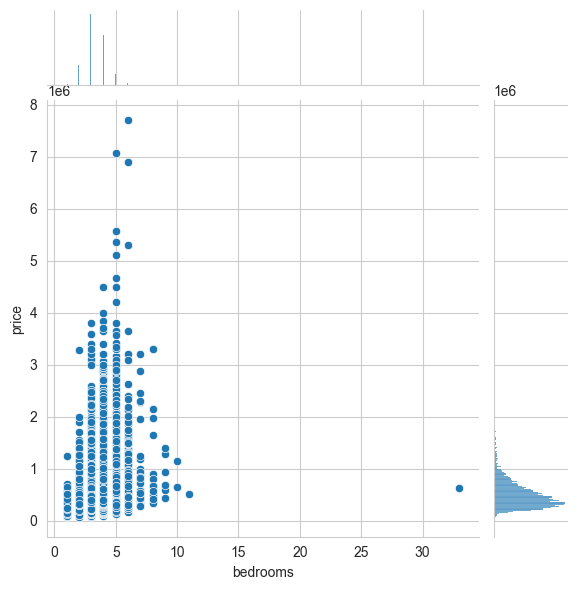

In [28]:
numerical_names = numerical_df.columns.tolist()
sns.jointplot(x= numerical_names[1], y = numerical_names[0], data=numerical_df);

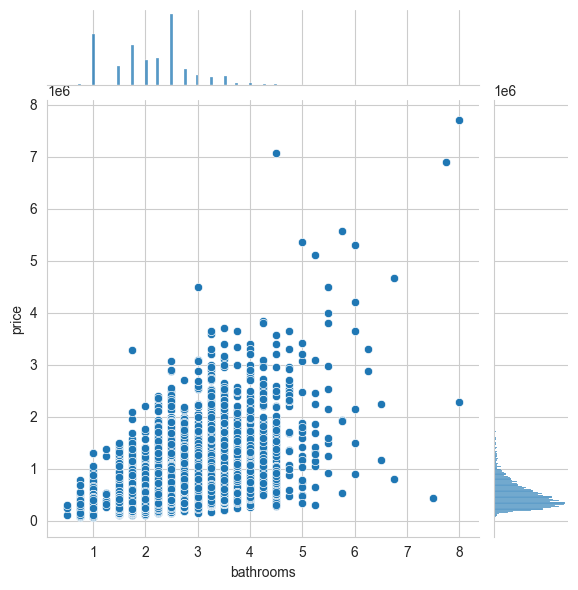

In [29]:

sns.jointplot(x= numerical_names[2], y = numerical_names[0], data=numerical_df);

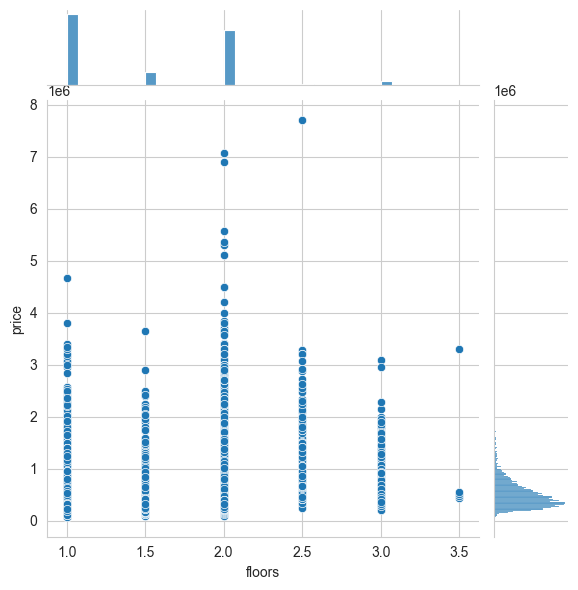

In [30]:
sns.jointplot(x= numerical_names[3], y = numerical_names[0], data=numerical_df);

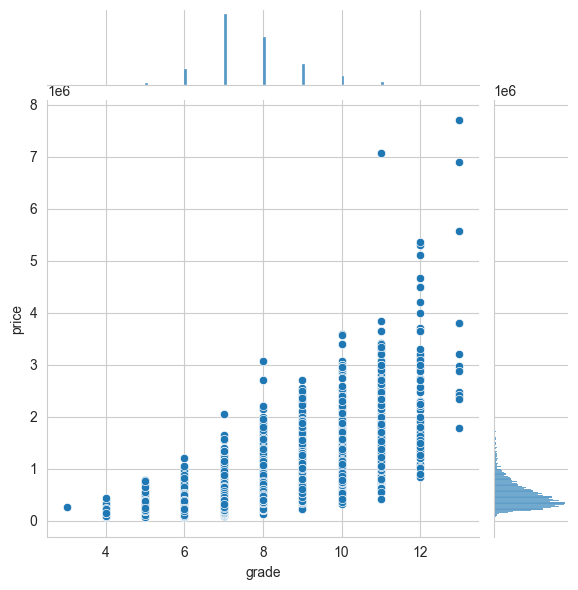

In [31]:
sns.jointplot(x= numerical_names[4], y = numerical_names[0], data=numerical_df);

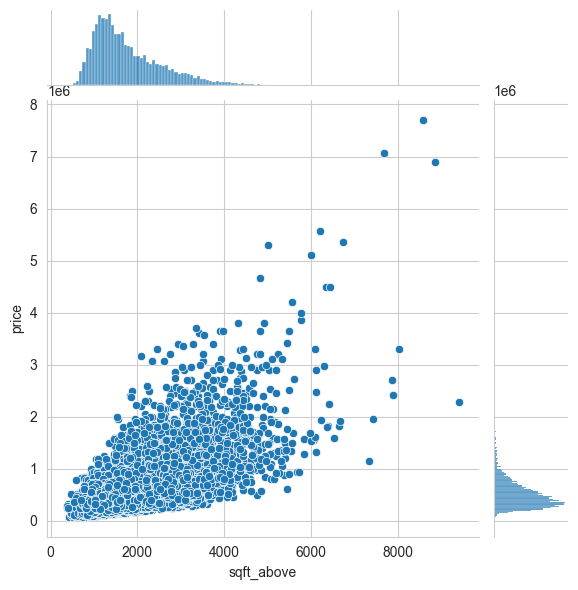

In [32]:

sns.jointplot(x= numerical_names[5], y = numerical_names[0], data=numerical_df);

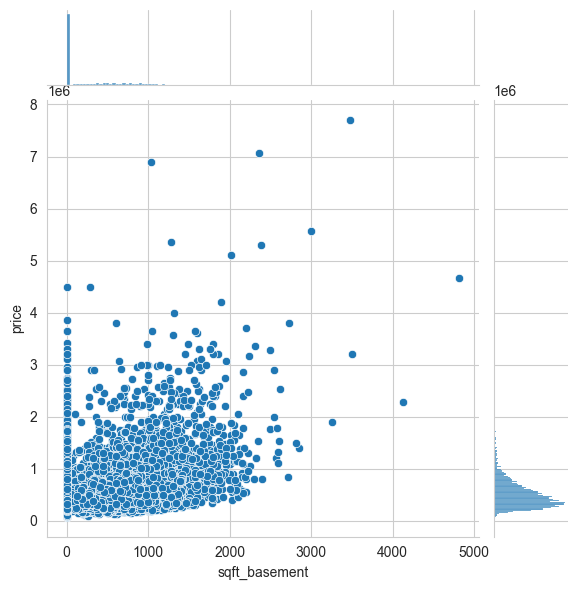

In [33]:

sns.jointplot(x= numerical_names[6], y = numerical_names[0], data=numerical_df);

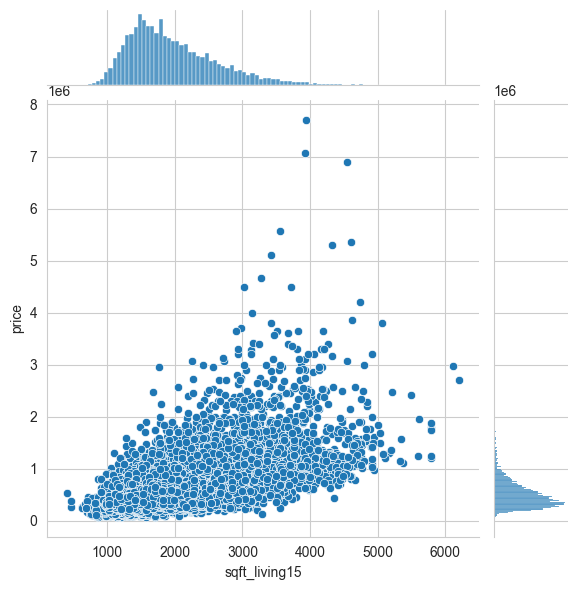

In [34]:

sns.jointplot(x= numerical_names[7], y = numerical_names[0], data=numerical_df);

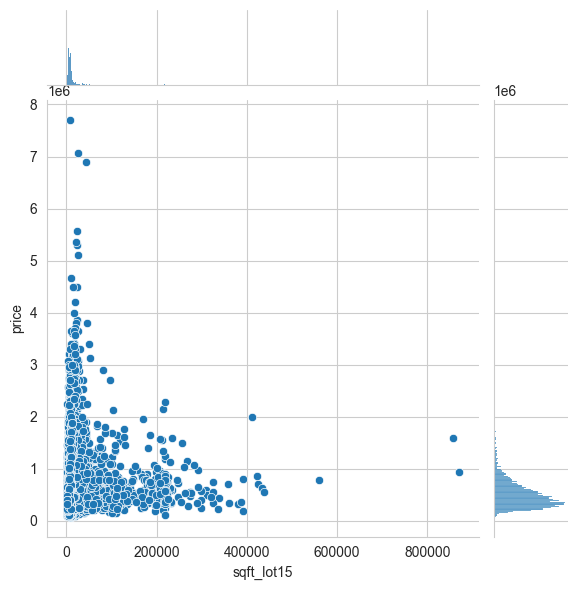

In [35]:

sns.jointplot(x= numerical_names[8], y = numerical_names[0], data=numerical_df);

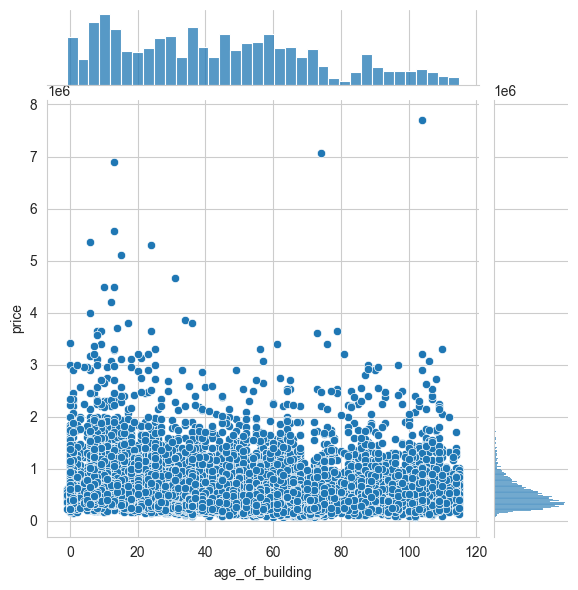

In [36]:

sns.jointplot(x= numerical_names[9], y = numerical_names[0], data=numerical_df);

<Axes: >

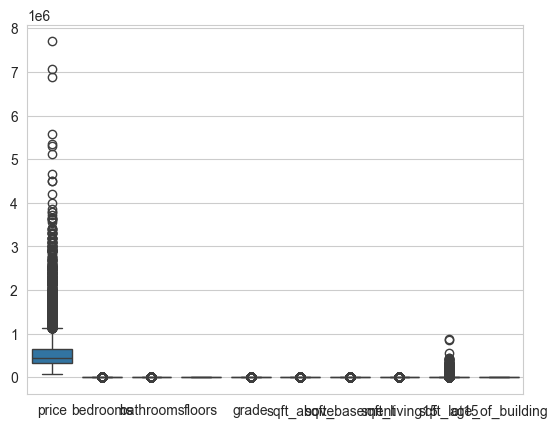

In [37]:
sns.boxplot(numerical_df)

## Correlation matrix

<Axes: >

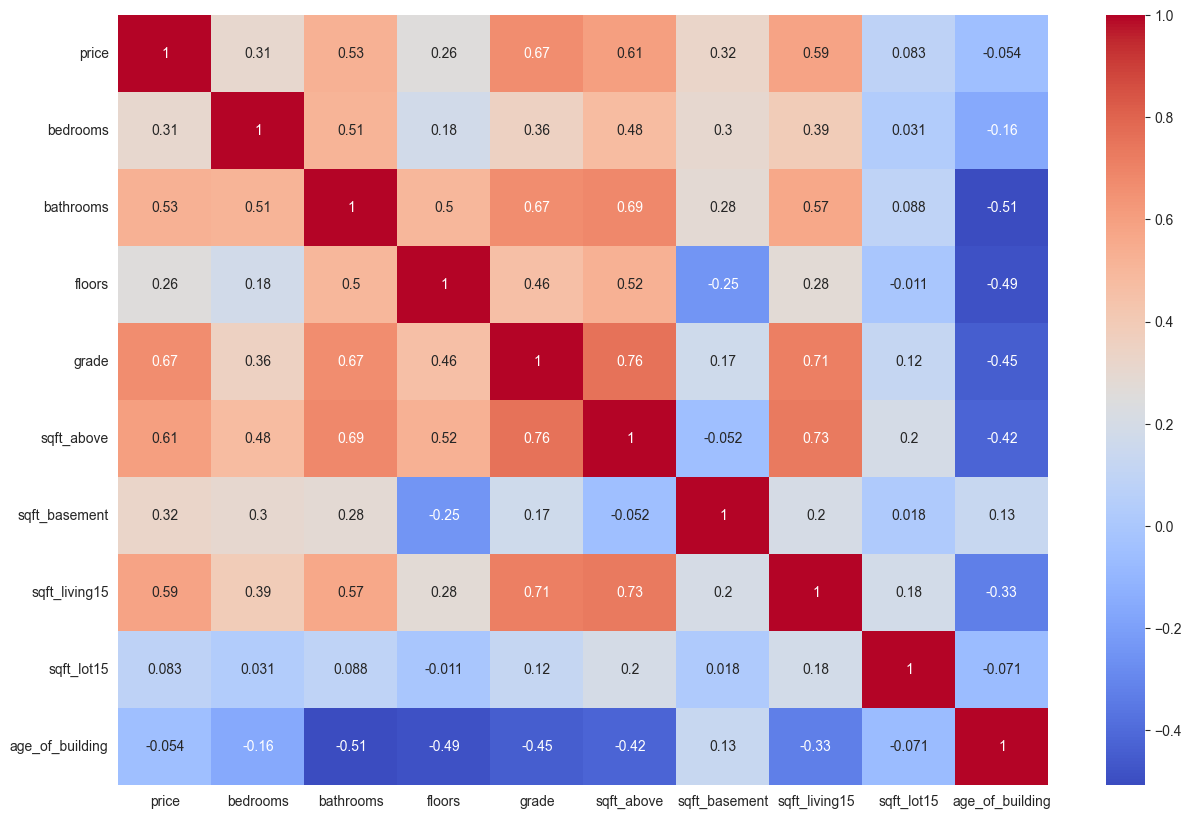

In [38]:
chain_map_w_outliers = numerical_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(chain_map_w_outliers, annot=True, cmap='coolwarm')

In [39]:
categories_df.columns

Index(['sales_year', 'waterfront', 'view', 'condition',
       '2015_living_renovation', '2015_lot_renovation'],
      dtype='object')

In [40]:
# categories where it has XOR relationship is droped to one
SY = pd.get_dummies(wa_housing_df['sales_year'],drop_first=False)
SY.drop([2014],axis=1, inplace = True)
SY.rename(columns={2015:"sold_in_2015"}, inplace = True)

W = pd.get_dummies(wa_housing_df['waterfront'],drop_first=False)
W.drop([0], axis=1, inplace=True)
W.rename(columns={1:'has_waterfront'}, inplace=True)


V = pd.get_dummies(wa_housing_df['view'],drop_first=False)
for i in range(len(V.columns)):
    V.rename(columns={V.columns[i]:"view" + str(i)}, inplace=True)

C = pd.get_dummies(wa_housing_df['condition'],drop_first=False)
for i in range(len(C.columns)):
    C.rename(columns={C.columns[i]:"condition" + str(i)}, inplace=True)

LiveR = pd.get_dummies(wa_housing_df['2015_living_renovation'],drop_first=False)
LiveR.drop([0],axis=1, inplace = True)
LiveR.rename(columns={1:"has_2015_living_renovation"}, inplace=True)


LotR = pd.get_dummies(wa_housing_df['2015_lot_renovation'],drop_first=False)
LotR.drop([0],axis=1, inplace = True)
LotR.rename(columns={1:'has_2015_lot_renovation'}, inplace=True)



In [41]:
working_data = wa_housing_df.copy()
working_data.drop(['view','condition','waterfront','sales_year', '2015_living_renovation','2015_lot_renovation'],axis=1, inplace=True)

In [42]:
working_data = pd.concat([working_data, SY, W, V, C, LiveR, LotR], axis=1)

In [43]:
working_data.head()

,price,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age_of_building,...,view2,view3,view4,condition0,condition1,condition2,condition3,condition4,has_2015_living_renovation,has_2015_lot_renovation
0,221900.0,3,1.00,1.0,7,1180,0,1340,5650,59,...,False,False,False,False,False,True,False,False,False,True
1,538000.0,3,2.25,2.0,7,2170,400,1690,7639,63,...,False,False,False,False,False,True,False,False,False,False
2,180000.0,2,1.00,1.0,6,770,0,2720,8062,82,...,False,False,False,False,False,True,False,False,False,False
3,604000.0,4,3.00,1.0,7,1050,910,1360,5000,49,...,False,False,False,False,False,False,False,True,False,True
4,510000.0,3,2.00,1.0,8,1680,0,1800,7503,28,...,False,False,False,False,False,True,False,False,False,False


In [44]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       21597 non-null  float64
 1   bedrooms                    21597 non-null  int64  
 2   bathrooms                   21597 non-null  float64
 3   floors                      21597 non-null  float64
 4   grade                       21597 non-null  int64  
 5   sqft_above                  21597 non-null  int64  
 6   sqft_basement               21597 non-null  int64  
 7   sqft_living15               21597 non-null  int64  
 8   sqft_lot15                  21597 non-null  int64  
 9   age_of_building             21597 non-null  int64  
 10  sold_in_2015                21597 non-null  bool   
 11  has_waterfront              21597 non-null  bool   
 12  view0                       21597 non-null  bool   
 13  view1                       215

In [45]:
bool_columns = working_data.select_dtypes(include='bool').columns 
working_data[bool_columns] = working_data[bool_columns].astype(int)


In [46]:
formatted_data = working_data.copy()
working_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       21597 non-null  float64
 1   bedrooms                    21597 non-null  int64  
 2   bathrooms                   21597 non-null  float64
 3   floors                      21597 non-null  float64
 4   grade                       21597 non-null  int64  
 5   sqft_above                  21597 non-null  int64  
 6   sqft_basement               21597 non-null  int64  
 7   sqft_living15               21597 non-null  int64  
 8   sqft_lot15                  21597 non-null  int64  
 9   age_of_building             21597 non-null  int64  
 10  sold_in_2015                21597 non-null  int64  
 11  has_waterfront              21597 non-null  int64  
 12  view0                       21597 non-null  int64  
 13  view1                       215

## Training and Testing Linear Regression Model

In [47]:
y = working_data['price']
X = working_data.drop(['price'], axis =1)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-4.33753961e+04  5.01254408e+04  3.02902213e+04  1.22041165e+05
  1.57119787e+02  1.68117191e+02  2.95190568e+01 -6.01394004e-01
  3.65114646e+03  2.40449333e+04  4.80723516e+05 -1.08732121e+05
  2.45686403e+03 -6.98378842e+04 -3.81132294e+03  1.79924464e+05
 -2.39899627e+04 -7.96376590e+03 -1.13722108e+04  1.89762838e+03
  4.14283110e+04 -6.47321989e+03  1.79201974e+04]


In [52]:
coefficients = pd.DataFrame(lm.coef_, X.columns)
coefficients.columns = ['Coeffecient']
coefficients

,Coeffecient
bedrooms,-43375.396092
bathrooms,50125.440791
floors,30290.221290
grade,122041.164892
sqft_above,157.119787
sqft_basement,168.117191
sqft_living15,29.519057
sqft_lot15,-0.601394
age_of_building,3651.146463
sold_in_2015,24044.933283


In [53]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Scatter Plot of Predictions on Data')

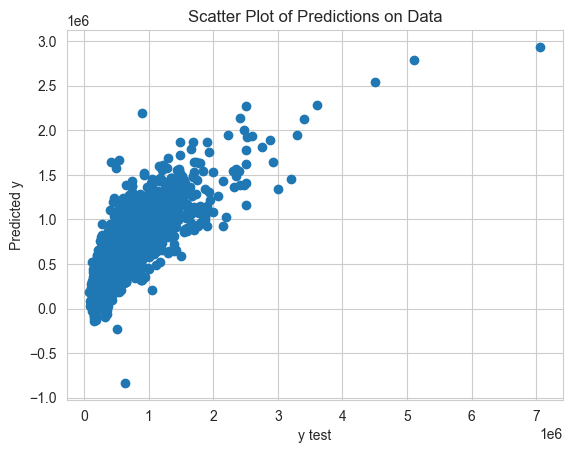

In [54]:
plt.scatter(y_test, predictions)
plt.xlabel('y test')
plt.ylabel('Predicted y')
plt.title('Scatter Plot of Predictions on Data')


In [55]:
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
error_score = metrics.r2_score(y_test, predictions)

In [56]:
print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R2 Error: {error_score}')

MAE: 140986.18410885672
MSE: 47298277977.956055
RMSE: 217481.67274038531
R2 Error: 0.6367713934327982


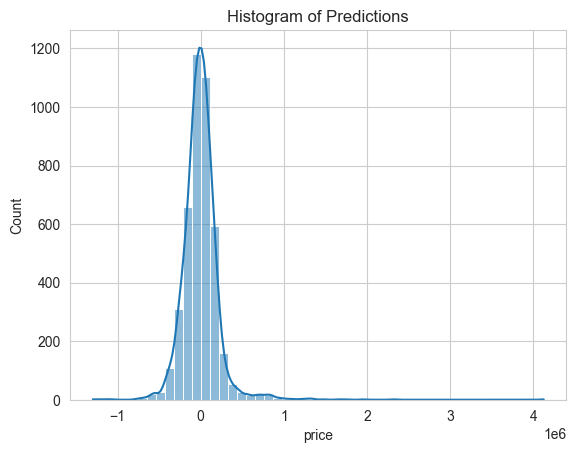

In [57]:
sns.histplot((y_test-predictions),bins =50,kde=True).set_title('Histogram of Predictions');

In [58]:
X2_train = sm.add_constant(X_train)
X2_test = sm.add_constant(X_test)

In [59]:
model2 = sm.OLS(y_train, X2_train)

In [60]:
model2_ = model2.fit()

In [61]:
print(model2_.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1614.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:57:10   Log-Likelihood:            -2.3659e+05
No. Observations:               17277   AIC:                         4.732e+05
Df Residuals:                   17255   BIC:                         4.734e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Standardising Data

In [62]:
scaler = StandardScaler()

In [63]:
scaled_working_data = pd.DataFrame(scaler.fit_transform(working_data), columns=working_data.columns)

In [64]:
scaled_working_data.head()

,price,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age_of_building,...,view2,view3,view4,condition0,condition1,condition2,condition3,condition4,has_2015_living_renovation,has_2015_lot_renovation
0,-0.866716,-0.402903,-1.451073,-0.915552,-0.560800,-0.735251,-0.659031,-0.943676,-0.260627,0.533646,...,-0.215799,-0.155517,-0.122442,-0.036669,-0.089073,0.735148,-0.597156,-0.292395,-0.366952,1.956329
1,-0.006252,-0.402903,0.174486,0.937431,-0.560800,0.460776,0.244602,-0.432887,-0.187700,0.669809,...,-0.215799,-0.155517,-0.122442,-0.036669,-0.089073,0.735148,-0.597156,-0.292395,-0.366952,-0.511161
2,-0.980773,-1.482493,-1.451073,-0.915552,-1.413190,-1.230575,-0.659031,1.070292,-0.172190,1.316582,...,-0.215799,-0.155517,-0.122442,-0.036669,-0.089073,0.735148,-0.597156,-0.292395,-0.366952,-0.511161
3,0.173409,0.676687,1.149821,-0.915552,-0.560800,-0.892305,1.396734,-0.914488,-0.284459,0.193239,...,-0.215799,-0.155517,-0.122442,-0.036669,-0.089073,-1.360271,-0.597156,3.420036,-0.366952,1.956329
4,-0.082471,-0.402903,-0.150626,-0.915552,0.291589,-0.131197,-0.659031,-0.272353,-0.192686,-0.521615,...,-0.215799,-0.155517,-0.122442,-0.036669,-0.089073,0.735148,-0.597156,-0.292395,-0.366952,-0.511161


In [65]:
y_scaled = scaled_working_data['price']
X_scaled = scaled_working_data.drop(['price'], axis=1)

In [66]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [67]:
lm = LinearRegression()
lm.fit(X_scaled_train, y_scaled_train)

LinearRegression()

In [68]:
coefficients = pd.DataFrame(lm.coef_, X.columns)
coefficients.columns = ['Coeffecient']
coefficients

,Coeffecient
bedrooms,-1.121017e-01
bathrooms,1.064052e-01
floors,4.460164e-02
grade,3.926896e-01
sqft_above,3.521592e-01
sqft_basement,2.016273e-01
sqft_living15,5.434953e-02
sqft_lot15,-4.523712e-02
age_of_building,2.925553e-01
sold_in_2015,3.017561e-02


In [69]:
predictions_scaled = lm.predict(X_scaled_test)

Text(0.5, 1.0, 'Scatter Plot Predictions On Scaled Data')

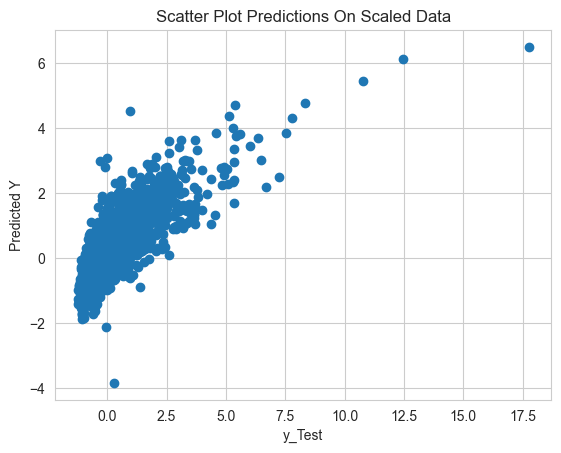

In [70]:
plt.scatter(y_scaled_test,predictions_scaled)
plt.xlabel('y_Test')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot Predictions On Scaled Data')

In [71]:
MAE_scaled = metrics.mean_absolute_error(y_scaled_test, predictions_scaled)
MSE_scaled = metrics.mean_squared_error(y_scaled_test, predictions_scaled)
RMSE_scaled = np.sqrt(metrics.mean_squared_error(y_scaled_test, predictions_scaled))
error_score_scaled = metrics.r2_score(y_scaled_test, predictions_scaled)

In [72]:
print(f'MAE: {MAE_scaled}')
print(f'MSE: {MSE_scaled}')
print(f'RMSE: {RMSE_scaled}')
print(f'R2 Error: {error_score_scaled}')

MAE: 0.3837837517593273
MSE: 0.35074637221237726
RMSE: 0.5922384420251503
R2 Error: 0.6364946788138336


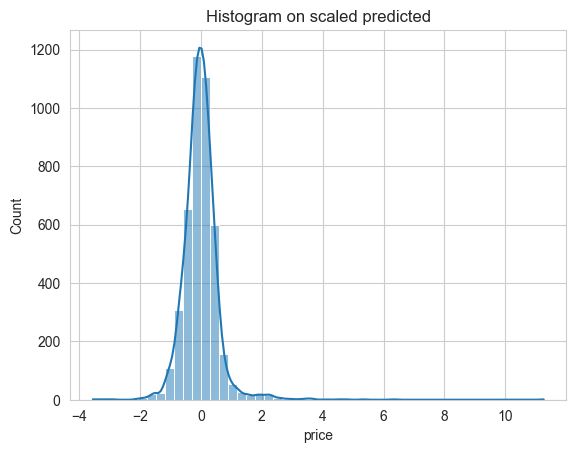

In [73]:
sns.histplot((y_scaled_test-predictions_scaled),bins =50, kde=True).set_title('Histogram on scaled predicted');

In [74]:
X2_train_scaled = sm.add_constant(X_scaled_train)
X2_test_scaled = sm.add_constant(X_scaled_test)

In [75]:
model2scaled = sm.OLS(y_scaled_train, X2_train_scaled)

In [76]:
model2scaled_ = model2scaled.fit()

In [77]:
print(model2scaled_.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1614.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:57:12   Log-Likelihood:                -15202.
No. Observations:               17277   AIC:                         3.045e+04
Df Residuals:                   17255   BIC:                         3.062e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Cleaning outliers

In [78]:
wa_housing_df_cleaned = formatted_data.copy()


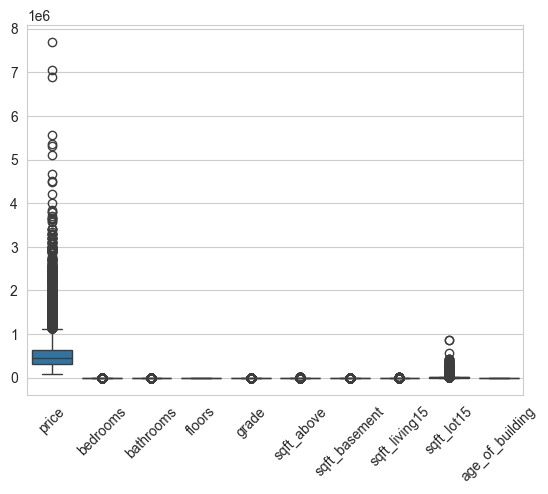

In [79]:
ax = sns.boxplot(wa_housing_df_cleaned[numerical_names])
ax.tick_params(axis='x', rotation=45)
plt.show()

/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_15929/885168604.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['price']<=Quant_90[0]]


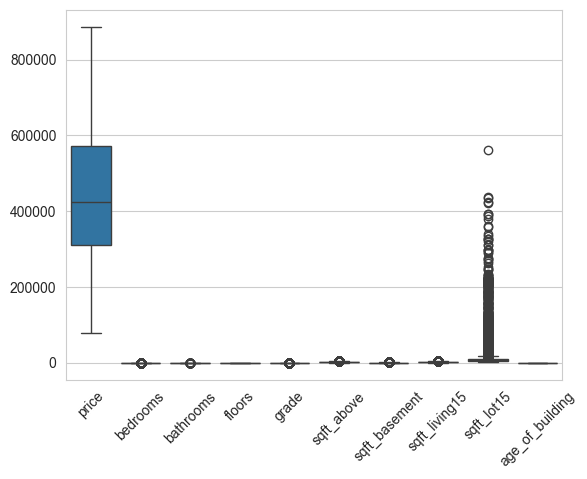

In [80]:
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['price']<=Quant_90[0]]
ax = sns.boxplot(wa_housing_df_cleaned[numerical_names])
ax.tick_params(axis='x', rotation=45)
plt.show()

In [81]:
Quant_90

price              887000.0
bedrooms                4.0
bathrooms               3.0
floors                  2.0
grade                   9.0
sqft_above           2950.0
sqft_basement         970.0
sqft_living15        2930.0
sqft_lot15          17822.0
age_of_building        89.0
Name: 0.9, dtype: float64

<Axes: ylabel='bedrooms'>

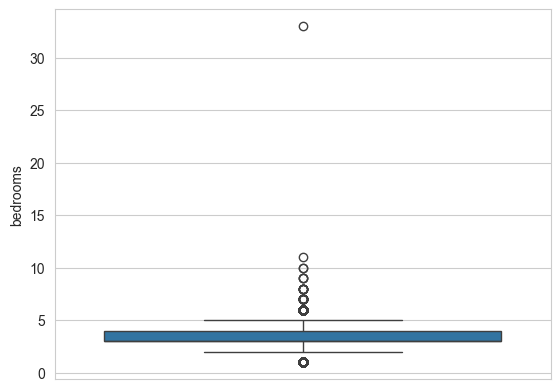

In [82]:
sns.boxplot(wa_housing_df_cleaned['bedrooms'])

/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_15929/3949781514.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['bedrooms']<=Quant_90[1]]


<Axes: ylabel='bedrooms'>

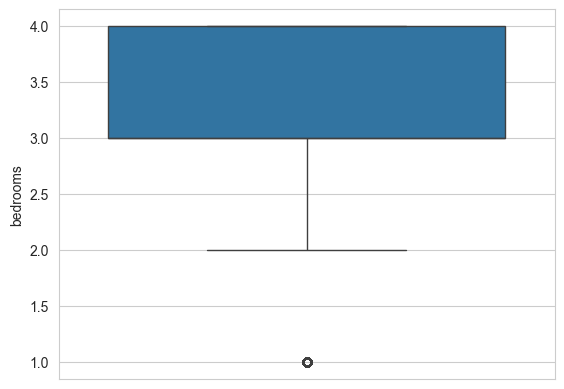

In [83]:
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['bedrooms']<=Quant_90[1]]
sns.boxplot(wa_housing_df_cleaned['bedrooms'])

In [84]:
Quant_90[7]

/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_15929/4011980465.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Quant_90[7]


2930.0

In [85]:

wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['floors']<=Quant_90[3]]
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['grade']<=Quant_90[4]]
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['sqft_above']<=Quant_90[5]]
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['sqft_basement']<=Quant_90[6]]
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['sqft_living15']<=Quant_90[7]]
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['sqft_lot15']<=Quant_90[8]]
wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['age_of_building']<=Quant_90[9]]




/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_15929/856575535.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['floors']<=Quant_90[3]]
/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_15929/856575535.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wa_housing_df_cleaned = wa_housing_df_cleaned[wa_housing_df_cleaned['grade']<=Quant_90[4]]
/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_15929/856575535.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer k

<Axes: >

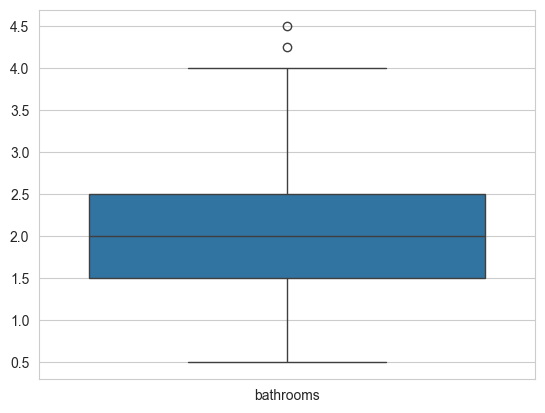

In [86]:
sns.boxplot(data=wa_housing_df_cleaned[['bathrooms']])

<Axes: ylabel='floors'>

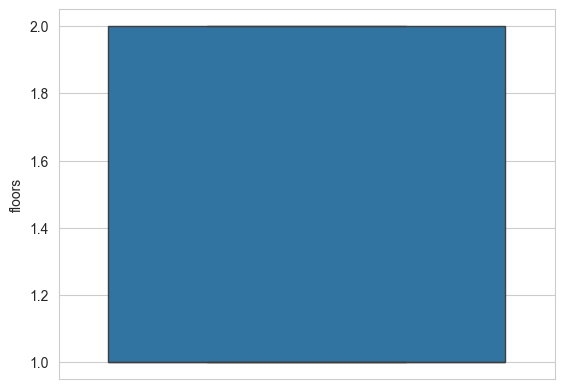

In [87]:

sns.boxplot(wa_housing_df_cleaned['floors'])

<Axes: ylabel='grade'>

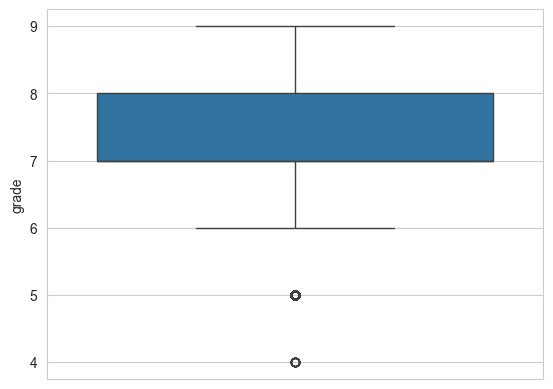

In [88]:

sns.boxplot(wa_housing_df_cleaned['grade'])

<Axes: ylabel='sqft_above'>

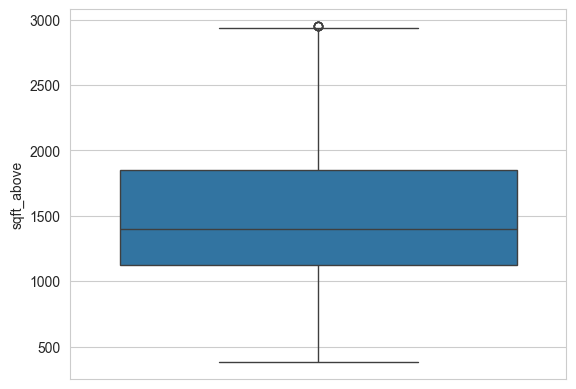

In [89]:

sns.boxplot(wa_housing_df_cleaned['sqft_above'])

<Axes: ylabel='sqft_basement'>

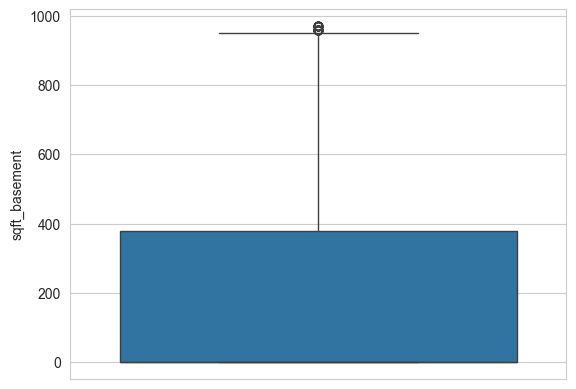

In [90]:
sns.boxplot(wa_housing_df_cleaned['sqft_basement'])

<Axes: ylabel='sqft_living15'>

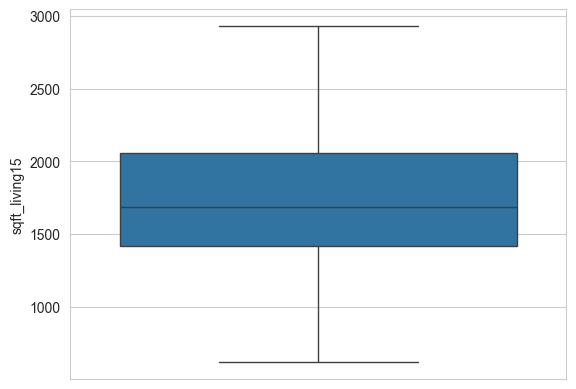

In [91]:
sns.boxplot(wa_housing_df_cleaned['sqft_living15'])

<Axes: ylabel='sqft_lot15'>

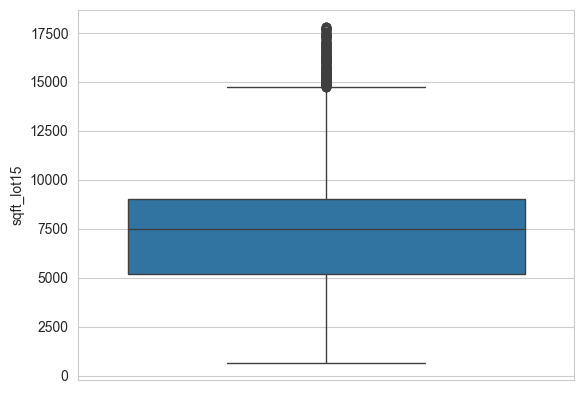

In [92]:
sns.boxplot(wa_housing_df_cleaned['sqft_lot15'])

<Axes: ylabel='age_of_building'>

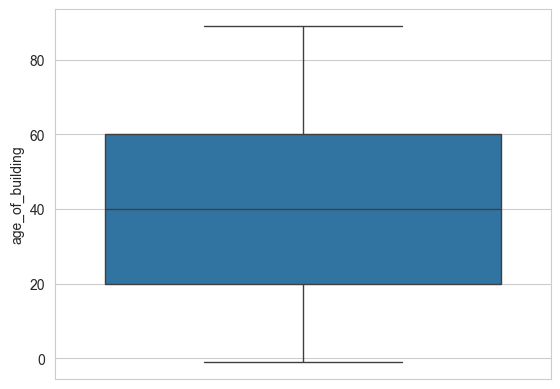

In [93]:
sns.boxplot(wa_housing_df_cleaned['age_of_building'])

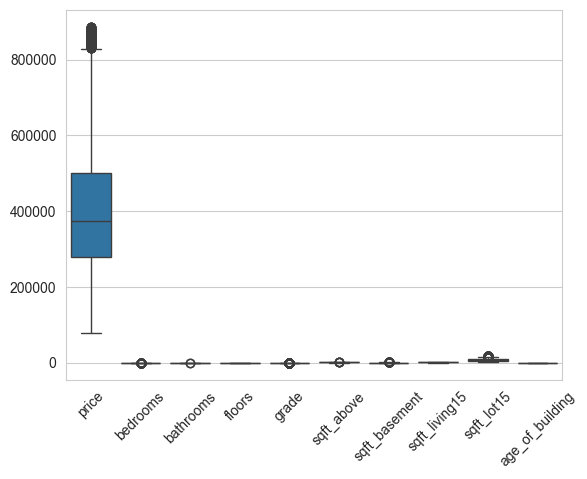

In [94]:
ax = sns.boxplot(wa_housing_df_cleaned[numerical_names])
ax.tick_params(axis='x', rotation=45)
plt.show()

In [95]:
cleaned_data = wa_housing_df_cleaned.copy()

In [96]:
wa_housing_df_cleaned.dtypes

price                         float64
bedrooms                        int64
bathrooms                     float64
floors                        float64
grade                           int64
sqft_above                      int64
sqft_basement                   int64
sqft_living15                   int64
sqft_lot15                      int64
age_of_building                 int64
sold_in_2015                    int64
has_waterfront                  int64
view0                           int64
view1                           int64
view2                           int64
view3                           int64
view4                           int64
condition0                      int64
condition1                      int64
condition2                      int64
condition3                      int64
condition4                      int64
has_2015_living_renovation      int64
has_2015_lot_renovation         int64
dtype: object

## Training and Testing Cleaned Data

In [97]:
# helper function for models and metrics
def model_and_metrics(df:pd.DataFrame)-> dict:
    df = df.copy()
    y = df['price']
    X = df.drop(['price'], axis=1)
    X_Train, X_Test, y_Train, y_Test = train_test_split(X,y,test_size=0.2, random_state=42)
    lm = LinearRegression()
    lm.fit(X_Train, y_Train)
    coefficients = pd.DataFrame(lm.coef_, X.columns)
    coefficients.columns = ['Coeffecient']
    predictions = lm.predict(X_Test)
    MAE = metrics.mean_absolute_error(y_Test, predictions)
    MSE = metrics.mean_squared_error(y_Test, predictions)
    RMSE = np.sqrt(metrics.mean_squared_error(y_Test, predictions))
    error_score = metrics.r2_score(y_Test, predictions)
    X2_Train = sm.add_constant(X_Train)
    X2_Test = sm.add_constant(X_Test)
    model2 = sm.OLS(y_Train, X2_Train)
    model2_ = model2.fit()
    dictionary = {
        'X_Train': X_Train,
        'X_Test': X_Test,
        'y_Train': y_Train,
        'y_Test': y_Test,
        'predictions': predictions,
        'coefficients': coefficients,
        'histplot': (y_Test-predictions),
        'metrics': f"MAE: {MAE}\nMSE: {MSE}\nRMSE: {RMSE}\nR2 Error: {error_score}",
        'OLS': model2_.summary()
    }
    return dictionary


In [98]:
wa_housing_df_cleaned_model = model_and_metrics(wa_housing_df_cleaned)

In [99]:
print(wa_housing_df_cleaned_model['metrics'])

MAE: 94196.50741709382
MSE: 13886903481.116217
RMSE: 117842.70652491064
R2 Error: 0.4286599092835264


Text(0, 0.5, 'Predicted Y')

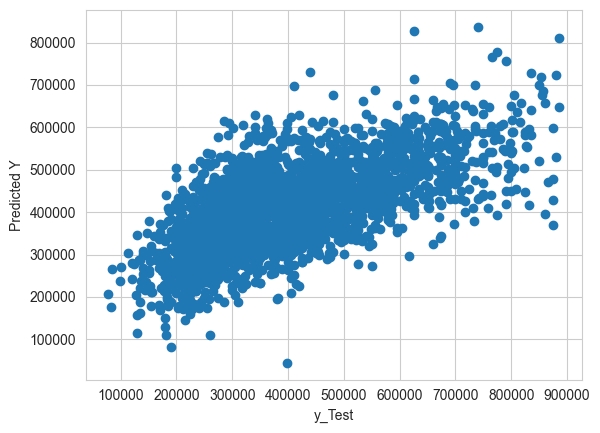

In [100]:
plt.scatter(wa_housing_df_cleaned_model['y_Test'],wa_housing_df_cleaned_model['predictions'])
plt.xlabel('y_Test')
plt.ylabel('Predicted Y')

<Axes: xlabel='price', ylabel='Count'>

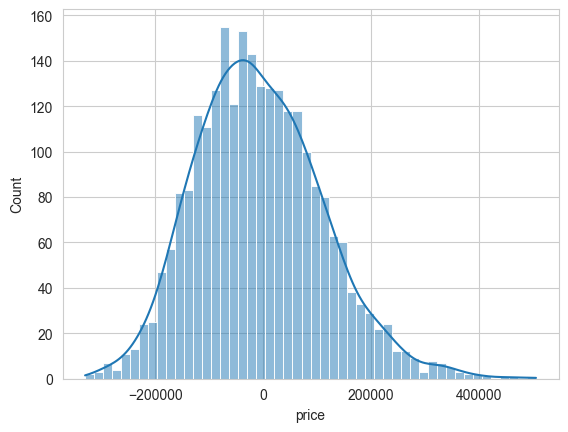

In [101]:
sns.histplot(wa_housing_df_cleaned_model['histplot'],bins=50, kde=True)

In [102]:
wa_housing_df_cleaned_model['OLS']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     409.9
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:57:15   Log-Likelihood:            -1.3102e+05
No. Observations:               10018   AIC:                         2.621e+05
Df Residuals:                    9996   BIC:                         2.622e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2.965e+05   1.36e+04    -21.771      0.000   -3.23e+05    -2.7e+05
bedrooms                   -2.084e+04   2171.784     -9.598      0.000   -2.51e+04   -1.66e+04
bathrooms                   2.481e+04   3237.560      7.664      0.000    1.85e+04    3.12e+04
floors                      1.457e+04   4033.298      3.611      0.000    6659.819    2.25e+04
grade                        8.23e+04   2063.990     39.875      0.000    7.83e+04    8.63e+04
sqft_above                    70.7336      4.522     15.641      0.000      61.869      79.598
sqft_basement                101.8525      5.483     18.577      0.000      91.105     112.600
sqft_living15                 56.2969      3.909     14.403      0.000      48.635      63.959
sqft_lot15                    -8.7921      0.469    -18.759      0.000      -9.711      -7.873
age_of_building             2564.4393     74.470     34.436      0.000    2418.464    2710.415
sold_in_2015                1.198e+04   2477.460      4.837      0.000    7127.660    1.68e+04
has_waterfront              1.698e+05   4.33e+04      3.920      0.000    8.49e+04    2.55e+05
view0                      -1.096e+05   6965.852    -15.731      0.000   -1.23e+05   -9.59e+04
view1                      -5.441e+04   1.22e+04     -4.473      0.000   -7.83e+04   -3.06e+04
view2                      -7.199e+04   9017.641     -7.983      0.000   -8.97e+04   -5.43e+04
view3                      -6.703e+04   1.22e+04     -5.480      0.000    -9.1e+04   -4.31e+04
view4                       6503.2272   2.73e+04      0.238      0.812    -4.7e+04       6e+04
condition0                 -4.132e+04    2.7e+04     -1.533      0.125   -9.42e+04    1.15e+04
condition1                 -1.034e+05   1.24e+04     -8.375      0.000   -1.28e+05   -7.92e+04
condition2                 -6.722e+04   6821.289     -9.854      0.000   -8.06e+04   -5.38e+04
condition3                 -5.595e+04   6934.217     -8.069      0.000   -6.95e+04   -4.24e+04
condition4                 -2.859e+04   7691.089     -3.717      0.000   -4.37e+04   -1.35e+04
has_2015_living_renovation -7911.3297   3404.346     -2.324      0.020   -1.46e+04   -1238.127
has_2015_lot_renovation     5102.6115   2883.136      1.770      0.077    -548.915    1.08e+04
==============================================================================
Omnibus:                      277.564   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.487
Skew:                           0.386   Prob(JB):                     2.30e-68
Kurtosis:                       3.388   Cond. No.                     8.67e+19
==============================================================================

Notes:
[1] Standard Errors assume that the 

In [103]:
wa_housing_df_cleaned.drop(['has_2015_living_renovation'], axis=1, inplace=True)

In [104]:
wa_housing_df_cleaned.dtypes

price                      float64
bedrooms                     int64
bathrooms                  float64
floors                     float64
grade                        int64
sqft_above                   int64
sqft_basement                int64
sqft_living15                int64
sqft_lot15                   int64
age_of_building              int64
sold_in_2015                 int64
has_waterfront               int64
view0                        int64
view1                        int64
view2                        int64
view3                        int64
view4                        int64
condition0                   int64
condition1                   int64
condition2                   int64
condition3                   int64
condition4                   int64
has_2015_lot_renovation      int64
dtype: object

In [105]:
wa_housing_df_cleaned_model2 = model_and_metrics(wa_housing_df_cleaned)

In [106]:
print(wa_housing_df_cleaned_model2['metrics'])

MAE: 94192.68416388691
MSE: 13892776582.258757
RMSE: 117867.6231297584
R2 Error: 0.4284182759961539


Text(0, 0.5, 'Predicted Y')

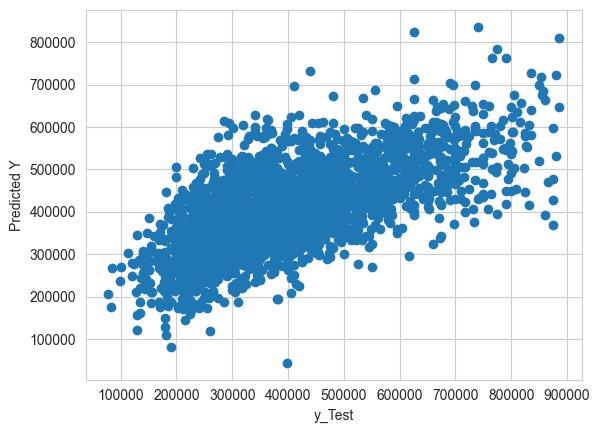

In [107]:
plt.scatter(wa_housing_df_cleaned_model2['y_Test'],wa_housing_df_cleaned_model2['predictions'])
plt.xlabel('y_Test')
plt.ylabel('Predicted Y')

<Axes: xlabel='price', ylabel='Count'>

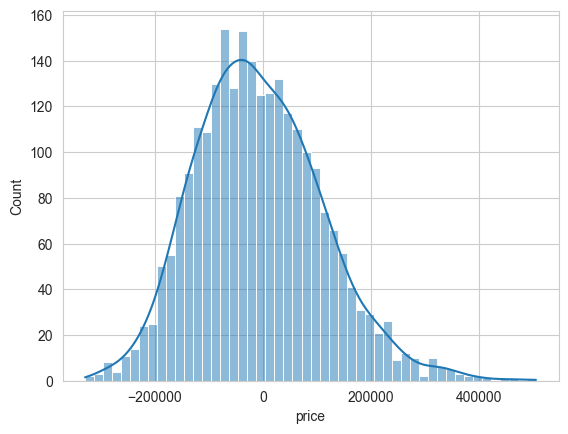

In [108]:
sns.histplot(wa_housing_df_cleaned_model2['histplot'],bins=50,kde=True)

In [109]:
wa_housing_df_cleaned_model2['OLS']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     429.9
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:57:16   Log-Likelihood:            -1.3102e+05
No. Observations:               10018   AIC:                         2.621e+05
Df Residuals:                    9997   BIC:                         2.622e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.982e+05   1.36e+04    -21.922      0.000   -3.25e+05   -2.72e+05
bedrooms                -2.093e+04   2171.950     -9.636      0.000   -2.52e+04   -1.67e+04
bathrooms                2.486e+04   3238.201      7.678      0.000    1.85e+04    3.12e+04
floors                    1.43e+04   4032.570      3.546      0.000    6395.978    2.22e+04
grade                    8.233e+04   2064.400     39.882      0.000    7.83e+04    8.64e+04
sqft_above                 70.7163      4.523     15.634      0.000      61.850      79.583
sqft_basement             101.7274      5.484     18.551      0.000      90.978     112.476
sqft_living15              56.6337      3.907     14.496      0.000      48.975      64.292
sqft_lot15                 -8.7414      0.468    -18.667      0.000      -9.659      -7.823
age_of_building          2579.5513     74.202     34.764      0.000    2434.101    2725.001
sold_in_2015             1.198e+04   2478.003      4.833      0.000    7118.944    1.68e+04
has_waterfront           1.706e+05   4.33e+04      3.938      0.000    8.57e+04    2.55e+05
view0                   -1.097e+05   6967.310    -15.738      0.000   -1.23e+05    -9.6e+04
view1                    -5.45e+04   1.22e+04     -4.480      0.000   -7.84e+04   -3.07e+04
view2                   -7.216e+04   9019.310     -8.001      0.000   -8.98e+04   -5.45e+04
view3                   -6.686e+04   1.22e+04     -5.465      0.000   -9.08e+04   -4.29e+04
view4                    4973.9981   2.73e+04      0.182      0.855   -4.86e+04    5.85e+04
condition0              -4.137e+04    2.7e+04     -1.534      0.125   -9.42e+04    1.15e+04
condition1              -1.035e+05   1.24e+04     -8.382      0.000   -1.28e+05   -7.93e+04
condition2              -6.775e+04   6818.999     -9.935      0.000   -8.11e+04   -5.44e+04
condition3              -5.646e+04   6932.294     -8.144      0.000      -7e+04   -4.29e+04
condition4              -2.908e+04   7689.872     -3.781      0.000   -4.42e+04    -1.4e+04
has_2015_lot_renovation  5008.2519   2883.484      1.737      0.082    -643.957    1.07e+04
==============================================================================
Omnibus:                      281.282   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.243
Skew:                           0.388   Prob(JB):                     2.13e-69
Kurtosis:                       3.393   Cond. No.                     7.20e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.3e-28. This might indicate that there are
strong multicollinearity problems or that 

In [110]:
wa_housing_df_cleaned.drop(['has_2015_lot_renovation','condition0','view4'], axis=1, inplace=True)

In [111]:
''' copy and paste for adjusting

wa_housing_df_cleaned.drop(['replace', 'this'], axis=1, inplace=True)

wa_housing_df_cleaned_modelx = model_and_metrics(wa_housing_df_cleaned)

print(wa_housing_df_cleaned_modelx['metrics'])

plt.scatter(wa_housing_df_cleaned_modelx['y_Test'],wa_housing_df_cleaned_modelx['predictions'])
plt.xlabel('y_Test')
plt.ylabel('Predicted Y')

sns.histplot(wa_housing_df_cleaned_modelx['histplot'],bins=50,kde=True)

wa_housing_df_cleaned_modelx['OLS']

'''

" copy and paste for adjusting\n\nwa_housing_df_cleaned.drop(['replace', 'this'], axis=1, inplace=True)\n\nwa_housing_df_cleaned_modelx = model_and_metrics(wa_housing_df_cleaned)\n\nprint(wa_housing_df_cleaned_modelx['metrics'])\n\nplt.scatter(wa_housing_df_cleaned_modelx['y_Test'],wa_housing_df_cleaned_modelx['predictions'])\nplt.xlabel('y_Test')\nplt.ylabel('Predicted Y')\n\nsns.histplot(wa_housing_df_cleaned_modelx['histplot'],bins=50,kde=True)\n\nwa_housing_df_cleaned_modelx['OLS']\n\n"

In [112]:

wa_housing_df_cleaned_model3 = model_and_metrics(wa_housing_df_cleaned)

In [113]:
print(wa_housing_df_cleaned_model3['metrics'])


MAE: 94224.74142719062
MSE: 13908308112.732721
RMSE: 117933.49020839127
R2 Error: 0.4277792720567928


Text(0, 0.5, 'Predicted Y')

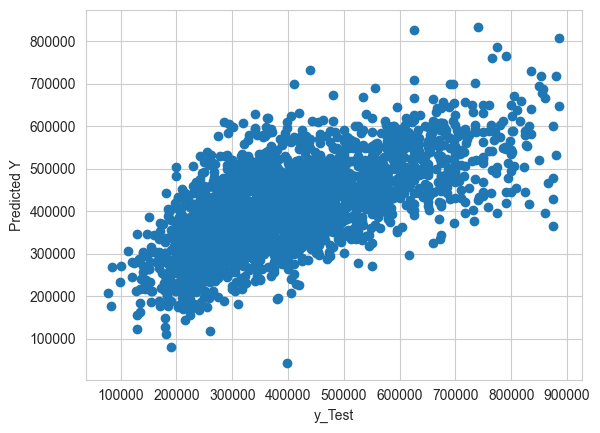

In [114]:

plt.scatter(wa_housing_df_cleaned_model3['y_Test'],wa_housing_df_cleaned_model3['predictions'])
plt.xlabel('y_Test')
plt.ylabel('Predicted Y')


<Axes: xlabel='price', ylabel='Count'>

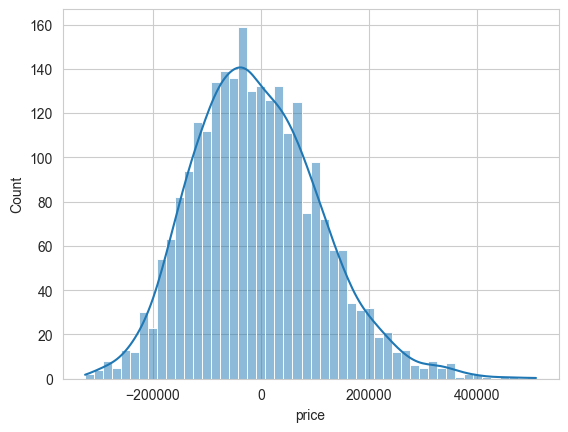

In [115]:

sns.histplot(wa_housing_df_cleaned_model3['histplot'],bins=50,kde=True)


In [116]:

wa_housing_df_cleaned_model3['OLS']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     452.3
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:57:17   Log-Likelihood:            -1.3102e+05
No. Observations:               10018   AIC:                         2.621e+05
Df Residuals:                    9998   BIC:                         2.622e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.336e+05   4.83e+04     -6.901      0.000   -4.28e+05   -2.39e+05
bedrooms        -2.085e+04   2171.699     -9.601      0.000   -2.51e+04   -1.66e+04
bathrooms        2.475e+04   3237.802      7.643      0.000    1.84e+04    3.11e+04
floors            1.41e+04   4031.279      3.497      0.000    6195.296     2.2e+04
grade            8.225e+04   2064.115     39.849      0.000    7.82e+04    8.63e+04
sqft_above         71.0860      4.519     15.732      0.000      62.229      79.943
sqft_basement     101.7644      5.484     18.556      0.000      91.014     112.514
sqft_living15      56.3315      3.903     14.431      0.000      48.680      63.983
sqft_lot15         -8.8258      0.466    -18.947      0.000      -9.739      -7.913
age_of_building  2592.3293     73.843     35.106      0.000    2447.581    2737.077
sold_in_2015     1.204e+04   2478.022      4.857      0.000    7177.681    1.69e+04
has_waterfront   1.701e+05   4.33e+04      3.928      0.000    8.52e+04    2.55e+05
view0           -1.141e+05   3.27e+04     -3.488      0.000   -1.78e+05      -5e+04
view1           -5.865e+04   3.49e+04     -1.683      0.092   -1.27e+05    9666.685
view2            -7.66e+04   3.33e+04     -2.300      0.021   -1.42e+05   -1.13e+04
view3           -7.174e+04   3.46e+04     -2.071      0.038    -1.4e+05   -3852.592
condition1      -6.182e+04   3.48e+04     -1.776      0.076    -1.3e+05    6420.305
condition2      -2.587e+04   3.25e+04     -0.797      0.425   -8.95e+04    3.77e+04
condition3       -1.46e+04   3.25e+04     -0.450      0.653   -7.82e+04     4.9e+04
condition4       1.274e+04   3.27e+04      0.390      0.697   -5.13e+04    7.68e+04
==============================================================================
Omnibus:                      281.329   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.239
Skew:                           0.389   Prob(JB):                     2.14e-69
Kurtosis:                       3.392   Cond. No.                     5.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
wa_housing_df_cleaned.drop(['view1', 'condition1','condition2','condition3','condition4'], axis=1, inplace=True)


In [118]:

wa_housing_df_cleaned_model4 = model_and_metrics(wa_housing_df_cleaned)


In [119]:

print(wa_housing_df_cleaned_model4['metrics'])


MAE: 94442.37562296545
MSE: 14053510829.214678
RMSE: 118547.50452546302
R2 Error: 0.42180528848875765


Text(0.5, 1.0, 'Predictions on Data 4th itheration')

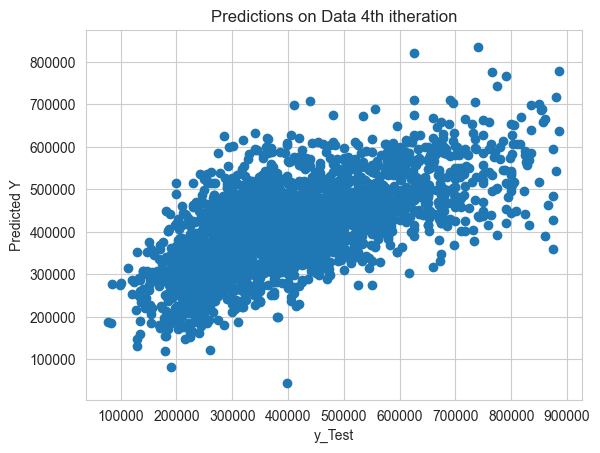

In [120]:

plt.scatter(wa_housing_df_cleaned_model4['y_Test'],wa_housing_df_cleaned_model4['predictions'])
plt.xlabel('y_Test')
plt.ylabel('Predicted Y')
plt.title('Predictions on Data 4th itheration')

Text(0.5, 1.0, 'Histogram on Prediction 4th iteration')

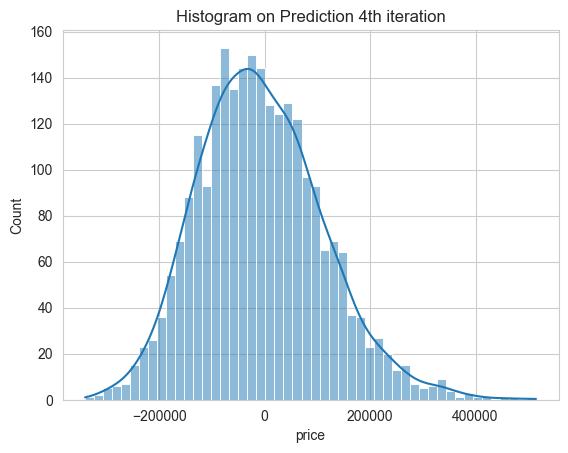

In [121]:

sns.histplot(wa_housing_df_cleaned_model4['histplot'],bins=50,kde=True).set_title('Histogram on Prediction 4th iteration')


In [122]:

wa_housing_df_cleaned_model4['OLS']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     603.6
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:57:18   Log-Likelihood:            -1.3106e+05
No. Observations:               10018   AIC:                         2.622e+05
Df Residuals:                   10003   BIC:                         2.623e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.147e+05   1.99e+04    -20.811      0.000   -4.54e+05   -3.76e+05
bedrooms        -1.988e+04   2175.292     -9.138      0.000   -2.41e+04   -1.56e+04
bathrooms        2.753e+04   3229.236      8.524      0.000    2.12e+04    3.39e+04
floors           1.198e+04   4030.156      2.972      0.003    4078.511    1.99e+04
grade            8.228e+04   2065.081     39.846      0.000    7.82e+04    8.63e+04
sqft_above         70.9079      4.534     15.640      0.000      62.021      79.795
sqft_basement     102.1725      5.503     18.566      0.000      91.385     112.960
sqft_living15      55.0648      3.911     14.080      0.000      47.399      62.731
sqft_lot15         -8.6908      0.465    -18.709      0.000      -9.601      -7.780
age_of_building  2735.4146     71.552     38.230      0.000    2595.159    2875.670
sold_in_2015     1.094e+04   2483.844      4.405      0.000    6073.107    1.58e+04
has_waterfront   2.161e+05   3.51e+04      6.156      0.000    1.47e+05    2.85e+05
view0            -6.33e+04   1.17e+04     -5.394      0.000   -8.63e+04   -4.03e+04
view2           -2.605e+04   1.36e+04     -1.921      0.055   -5.26e+04     525.626
view3           -2.325e+04    1.7e+04     -1.369      0.171   -5.65e+04       1e+04
==============================================================================
Omnibus:                      274.340   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.765
Skew:                           0.385   Prob(JB):                     2.44e-67
Kurtosis:                       3.377   Cond. No.                     2.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
wa_housing_df_cleaned_model4['coefficients']

,Coeffecient
bedrooms,-19877.113505
bathrooms,27525.821946
floors,11978.427635
grade,82284.496720
sqft_above,70.907885
sqft_basement,102.172501
sqft_living15,55.064777
sqft_lot15,-8.690841
age_of_building,2735.414551
sold_in_2015,10941.940367


In [124]:
print('---model 1 ---')
print(wa_housing_df_cleaned_model['metrics'])
print('---model 2 ---')
print(wa_housing_df_cleaned_model2['metrics'])
print('---model 3 ---')
print(wa_housing_df_cleaned_model3['metrics'])
print('---model 4 ---')
print(wa_housing_df_cleaned_model4['metrics'])


---model 1 ---
MAE: 94196.50741709382
MSE: 13886903481.116217
RMSE: 117842.70652491064
R2 Error: 0.4286599092835264
---model 2 ---
MAE: 94192.68416388691
MSE: 13892776582.258757
RMSE: 117867.6231297584
R2 Error: 0.4284182759961539
---model 3 ---
MAE: 94224.74142719062
MSE: 13908308112.732721
RMSE: 117933.49020839127
R2 Error: 0.4277792720567928
---model 4 ---
MAE: 94442.37562296545
MSE: 14053510829.214678
RMSE: 118547.50452546302
R2 Error: 0.42180528848875765


## Training/Testing Cleaned and Standarized Data

In [125]:
scaled_cleaned_data = pd.DataFrame(scaler.fit_transform(cleaned_data), columns=cleaned_data.columns)

In [126]:
scaled_cleaned_data.head()

,price,bedrooms,bathrooms,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age_of_building,...,view2,view3,view4,condition0,condition1,condition2,condition3,condition4,has_2015_living_renovation,has_2015_lot_renovation
0,-1.158802,-0.182130,-1.450380,-0.828860,-0.365066,-0.643333,-0.639810,-0.911811,-0.563094,0.760959,...,-0.165025,-0.091066,-0.046483,-0.03463,-0.09062,0.723775,-0.605428,-0.266254,-0.401032,1.910551
1,0.847729,-0.182130,0.537614,1.292067,-0.365066,1.238547,0.738064,-0.135356,0.099839,0.928081,...,-0.165025,-0.091066,-0.046483,-0.03463,-0.09062,0.723775,-0.605428,-0.266254,-0.401032,-0.523409
2,-1.424774,-1.669942,-1.450380,-0.828860,-1.615194,-1.422697,-0.639810,2.149640,0.240825,1.721909,...,-0.165025,-0.091066,-0.046483,-0.03463,-0.09062,0.723775,-0.605428,-0.266254,-0.401032,-0.523409
3,1.266683,1.305682,1.730410,-0.828860,-0.365066,-0.890448,2.494853,-0.867442,-0.779738,0.343155,...,-0.165025,-0.091066,-0.046483,-0.03463,-0.09062,-1.381645,-0.605428,3.755816,-0.401032,1.910551
4,0.669992,-0.182130,0.140015,-0.828860,0.885063,0.307111,-0.639810,0.108673,0.054510,-0.534234,...,-0.165025,-0.091066,-0.046483,-0.03463,-0.09062,0.723775,-0.605428,-0.266254,-0.401032,-0.523409


In [127]:
'''
scaled_cleaned_data.drop(['replace', 'this'], axis=1, inplace=True)

scaled_cleaned_data_modelx = model_and_metrics(scaled_cleaned_data)

print(scaled_cleaned_data_modelx['metrics'])

plt.scatter(scaled_cleaned_data_modelx['y_Test'],scaled_cleaned_data_modelx['predictions'])
plt.xlabel('y_Test')
plt.ylabel('Predicted Y')

sns.histplot(scaled_cleaned_data_modelx['histplot'],bins=50,kde=True)

scaled_cleaned_data_modelx['OLS']
'''

"\nscaled_cleaned_data.drop(['replace', 'this'], axis=1, inplace=True)\n\nscaled_cleaned_data_modelx = model_and_metrics(scaled_cleaned_data)\n\nprint(scaled_cleaned_data_modelx['metrics'])\n\nplt.scatter(scaled_cleaned_data_modelx['y_Test'],scaled_cleaned_data_modelx['predictions'])\nplt.xlabel('y_Test')\nplt.ylabel('Predicted Y')\n\nsns.histplot(scaled_cleaned_data_modelx['histplot'],bins=50,kde=True)\n\nscaled_cleaned_data_modelx['OLS']\n"

In [128]:
scaled_cleaned_data_model = model_and_metrics(scaled_cleaned_data)


In [129]:

print(scaled_cleaned_data_model['metrics'])


MAE: 0.5978572911100337
MSE: 0.5595394066417915
RMSE: 0.7480236671668828
R2 Error: 0.4286832730494712


Text(0, 0.5, 'Predicted Y')

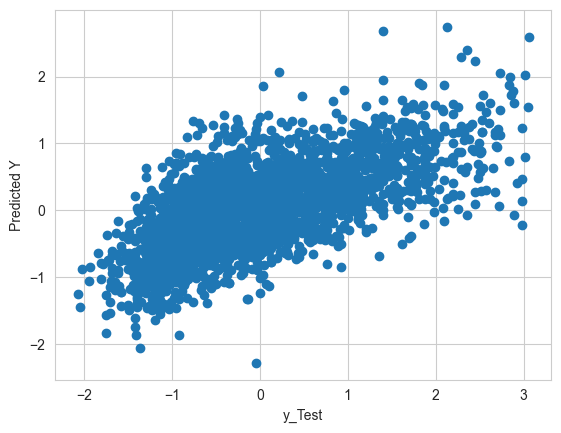

In [130]:

plt.scatter(scaled_cleaned_data_model['y_Test'],scaled_cleaned_data_model['predictions'])
plt.xlabel('y_Test')
plt.ylabel('Predicted Y')


<Axes: xlabel='price', ylabel='Count'>

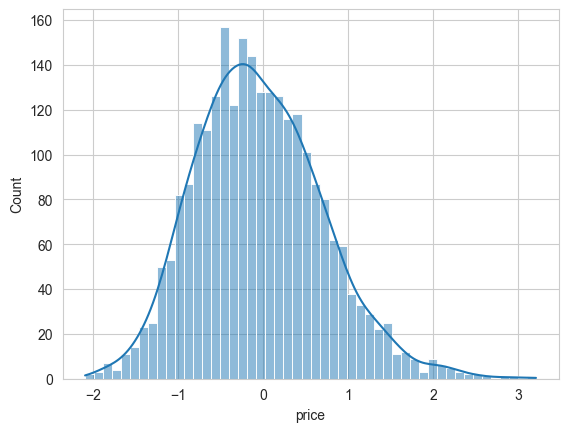

In [131]:

sns.histplot(scaled_cleaned_data_model['histplot'],bins=50,kde=True)


In [132]:

scaled_cleaned_data_model['OLS']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     409.9
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:57:20   Log-Likelihood:                -11128.
No. Observations:               10018   AIC:                         2.230e+04
Df Residuals:                    9996   BIC:                         2.246e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0098      0.007      1.327      0.185      -0.005       0.024
bedrooms                      -0.0889      0.009     -9.598      0.000      -0.107      -0.071
bathrooms                      0.0990      0.013      7.664      0.000       0.074       0.124
floors                         0.0436      0.012      3.611      0.000       0.020       0.067
grade                          0.4179      0.010     39.875      0.000       0.397       0.438
sqft_above                     0.2362      0.015     15.641      0.000       0.207       0.266
sqft_basement                  0.1877      0.010     18.577      0.000       0.168       0.207
sqft_living15                  0.1611      0.011     14.403      0.000       0.139       0.183
sqft_lot15                    -0.1674      0.009    -18.759      0.000      -0.185      -0.150
age_of_building                0.3896      0.011     34.436      0.000       0.367       0.412
sold_in_2015                   0.0357      0.007      4.837      0.000       0.021       0.050
has_waterfront                 0.0347      0.009      3.920      0.000       0.017       0.052
view0                         -0.0313      0.004     -7.840      0.000      -0.039      -0.023
view1                          0.0201      0.007      2.826      0.005       0.006       0.034
view2                          0.0146      0.006      2.601      0.009       0.004       0.026
view3                          0.0110      0.007      1.644      0.100      -0.002       0.024
view4                          0.0273      0.009      2.905      0.004       0.009       0.046
condition0                     0.0038      0.007      0.529      0.597      -0.010       0.018
condition1                    -0.0257      0.007     -3.498      0.000      -0.040      -0.011
condition2                    -0.0265      0.004     -6.002      0.000      -0.035      -0.018
condition3                     0.0069      0.005      1.472      0.141      -0.002       0.016
condition4                     0.0471      0.007      7.084      0.000       0.034       0.060
has_2015_living_renovation    -0.0173      0.007     -2.324      0.020      -0.032      -0.003
has_2015_lot_renovation        0.0133      0.008      1.770      0.077      -0.001       0.028
==============================================================================
Omnibus:                      277.564   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.487
Skew:                           0.386   Prob(JB):                     2.30e-68
Kurtosis:                       3.388   Cond. No.                     6.07e+15
==============================================================================

Notes:
[1] Standard Errors assume that the 

In [133]:
scaled_cleaned_data.drop(['has_2015_lot_renovation', 'condition3','condition0','view3'], axis=1, inplace=True)


In [134]:

scaled_cleaned_data_model1 = model_and_metrics(scaled_cleaned_data)


In [135]:

print(scaled_cleaned_data_model1['metrics'])


MAE: 0.5980869624641931
MSE: 0.5601394432321549
RMSE: 0.7484246409840839
R2 Error: 0.4280706067443141


Text(0, 0.5, 'Predicted Y')

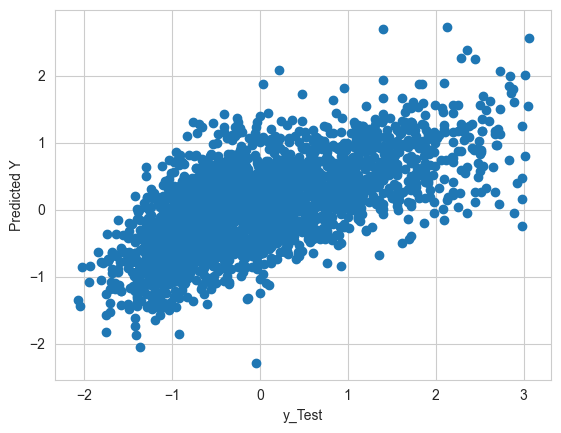

In [136]:

plt.scatter(scaled_cleaned_data_model1['y_Test'],scaled_cleaned_data_model1['predictions'])
plt.xlabel('y_Test')
plt.ylabel('Predicted Y')


<Axes: xlabel='price', ylabel='Count'>

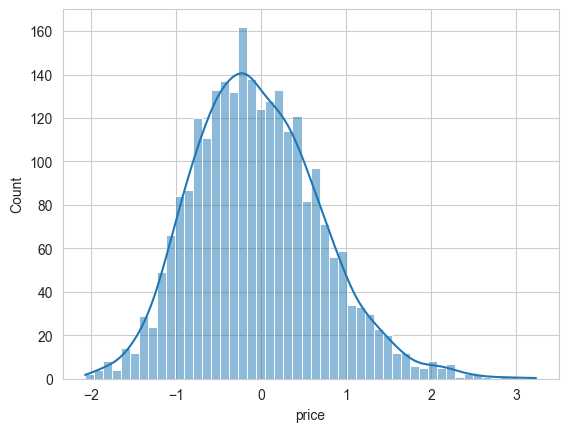

In [137]:

sns.histplot(scaled_cleaned_data_model1['histplot'],bins=50,kde=True)


In [138]:

scaled_cleaned_data_model1['OLS']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     452.8
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:57:22   Log-Likelihood:                -11130.
No. Observations:               10018   AIC:                         2.230e+04
Df Residuals:                    9998   BIC:                         2.244e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0097      0.007      1.326      0.185      -0.005       0.024
bedrooms                      -0.0887      0.009     -9.576      0.000      -0.107      -0.071
bathrooms                      0.0986      0.013      7.634      0.000       0.073       0.124
floors                         0.0431      0.012      3.571      0.000       0.019       0.067
grade                          0.4172      0.010     39.887      0.000       0.397       0.438
sqft_above                     0.2374      0.015     15.737      0.000       0.208       0.267
sqft_basement                  0.1877      0.010     18.579      0.000       0.168       0.208
sqft_living15                  0.1604      0.011     14.364      0.000       0.139       0.182
sqft_lot15                    -0.1690      0.009    -19.036      0.000      -0.186      -0.152
age_of_building                0.3917      0.011     34.797      0.000       0.370       0.414
sold_in_2015                   0.0359      0.007      4.866      0.000       0.021       0.050
has_waterfront                 0.0348      0.009      3.938      0.000       0.017       0.052
view0                         -0.0565      0.017     -3.316      0.001      -0.090      -0.023
view1                          0.0084      0.011      0.762      0.446      -0.013       0.030
view2                         -0.0046      0.015     -0.312      0.755      -0.033       0.024
view4                          0.0217      0.010      2.125      0.034       0.002       0.042
condition1                    -0.0272      0.008     -3.617      0.000      -0.042      -0.012
condition2                    -0.0341      0.009     -3.964      0.000      -0.051      -0.017
condition4                     0.0430      0.008      5.355      0.000       0.027       0.059
has_2015_living_renovation    -0.0172      0.007     -2.302      0.021      -0.032      -0.003
==============================================================================
Omnibus:                      278.111   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.069
Skew:                           0.387   Prob(JB):                     1.72e-68
Kurtosis:                       3.387   Cond. No.                         6.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
scaled_cleaned_data.drop(['view2','view1'], axis=1, inplace=True)


In [140]:

scaled_cleaned_data_model2 = model_and_metrics(scaled_cleaned_data)


In [141]:

print(scaled_cleaned_data_model2['metrics'])


MAE: 0.5980201132988425
MSE: 0.5598365602865915
RMSE: 0.7482222666337801
R2 Error: 0.42837986484312607


Text(0.5, 1.0, 'Scatter Plot of predictions for Scaled Data 3rd iteration')

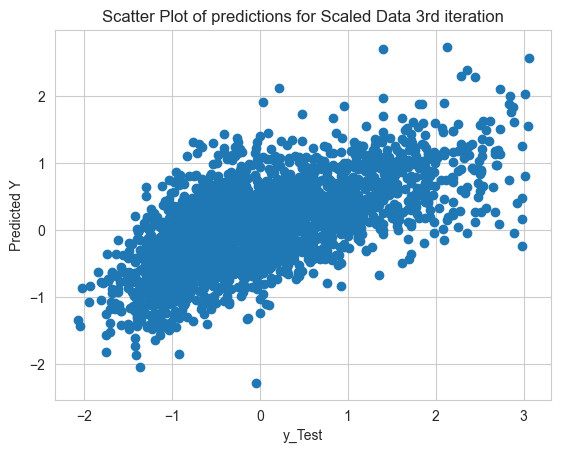

In [142]:

plt.scatter(scaled_cleaned_data_model2['y_Test'],scaled_cleaned_data_model2['predictions'])
plt.xlabel('y_Test')
plt.ylabel('Predicted Y')
plt.title('Scatter Plot of predictions for Scaled Data 3rd iteration')


Text(0.5, 1.0, 'Histogram on Scaled Data 3rd iteration')

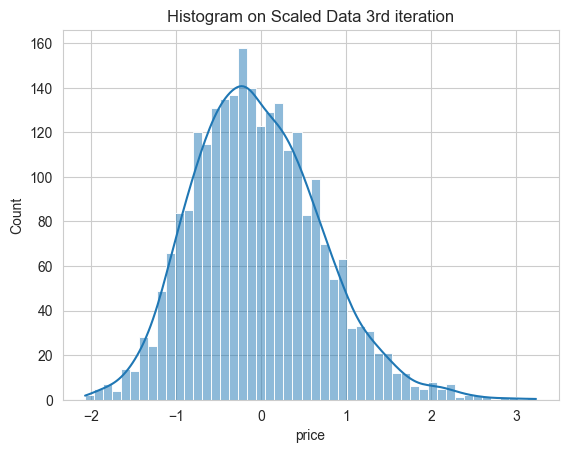

In [143]:

sns.histplot(scaled_cleaned_data_model2['histplot'],bins=50,kde=True).set_title('Histogram on Scaled Data 3rd iteration')


In [144]:

scaled_cleaned_data_model2['OLS']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     506.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:57:23   Log-Likelihood:                -11130.
No. Observations:               10018   AIC:                         2.230e+04
Df Residuals:                   10000   BIC:                         2.243e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0097      0.007      1.314      0.189      -0.005       0.024
bedrooms                      -0.0888      0.009     -9.585      0.000      -0.107      -0.071
bathrooms                      0.0982      0.013      7.605      0.000       0.073       0.124
floors                         0.0432      0.012      3.580      0.000       0.020       0.067
grade                          0.4171      0.010     39.879      0.000       0.397       0.438
sqft_above                     0.2377      0.015     15.760      0.000       0.208       0.267
sqft_basement                  0.1880      0.010     18.612      0.000       0.168       0.208
sqft_living15                  0.1606      0.011     14.382      0.000       0.139       0.182
sqft_lot15                    -0.1692      0.009    -19.060      0.000      -0.187      -0.152
age_of_building                0.3917      0.011     34.799      0.000       0.370       0.414
sold_in_2015                   0.0360      0.007      4.879      0.000       0.022       0.050
has_waterfront                 0.0347      0.009      3.927      0.000       0.017       0.052
view0                         -0.0565      0.008     -7.198      0.000      -0.072      -0.041
view4                          0.0217      0.010      2.241      0.025       0.003       0.041
condition1                    -0.0272      0.008     -3.611      0.000      -0.042      -0.012
condition2                    -0.0345      0.009     -4.006      0.000      -0.051      -0.018
condition4                     0.0428      0.008      5.335      0.000       0.027       0.059
has_2015_living_renovation    -0.0172      0.007     -2.305      0.021      -0.032      -0.003
==============================================================================
Omnibus:                      277.590   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.364
Skew:                           0.386   Prob(JB):                     2.44e-68
Kurtosis:                       3.386   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
scaled_cleaned_data_model2['coefficients']

,Coeffecient
bedrooms,-0.088768
bathrooms,0.098208
floors,0.043186
grade,0.417098
sqft_above,0.237686
sqft_basement,0.187985
sqft_living15,0.160570
sqft_lot15,-0.169185
age_of_building,0.391693
sold_in_2015,0.036009


In [146]:
print('--- model 1 ---')
print(scaled_cleaned_data_model['metrics'])
print('--- model 2 ---')
print(scaled_cleaned_data_model1['metrics'])
print('--- model 3 ---')
print(scaled_cleaned_data_model2['metrics'])

--- model 1 ---
MAE: 0.5978572911100337
MSE: 0.5595394066417915
RMSE: 0.7480236671668828
R2 Error: 0.4286832730494712
--- model 2 ---
MAE: 0.5980869624641931
MSE: 0.5601394432321549
RMSE: 0.7484246409840839
R2 Error: 0.4280706067443141
--- model 3 ---
MAE: 0.5980201132988425
MSE: 0.5598365602865915
RMSE: 0.7482222666337801
R2 Error: 0.42837986484312607
